# 2 EDA 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import wandb
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
wandb.login()

wandb: Currently logged in as: d-a-pop (midigpt). Use `wandb login --relogin` to force relogin


True

In [3]:
PROJECT_NAME = "Goodreads Books Reviews"
ENTITY = 'd-a-pop'

In [4]:
run = wandb.init(project=PROJECT_NAME, entity=ENTITY, job_type="upload")

wandb: Currently logged in as: d-a-pop. Use `wandb login --relogin` to force relogin


In [5]:
artifact = wandb.Artifact("Raw_data", type="dataset")

In [6]:
artifact.add_file('goodreads_train.csv')
artifact.add_file('goodreads_test.csv')

ArtifactManifestEntry(path='goodreads_test.csv', digest='H0Z7vWxn0ToxdY80EVFXrA==', ref=None, birth_artifact_id=None, size=607466089, extra={}, local_path='/Users/dragos/Library/Application Support/wandb/artifacts/staging/tmpkek125lg')

In [4]:
train = pd.read_csv("goodreads_train.csv")
test = pd.read_csv("goodreads_test.csv")

In [8]:
table_train = wandb.Table(dataframe=train)
table_test = wandb.Table(dataframe=test)

In [9]:
artifact.add(table_train, "table_train")
artifact.add(table_test, "table_test")

ArtifactManifestEntry(path='table_test.table.json', digest='fKmTrHVrFaMp6szo1uAvow==', ref=None, birth_artifact_id=None, size=260928072, extra={}, local_path='/Users/dragos/Library/Application Support/wandb/artifacts/staging/tmphenewkaj')

In [10]:
run.log_artifact(artifact)
run.finish()

### Data split

In [5]:
len(train)

900000

In [6]:
X_train, X_val, y_train, y_val = train_test_split(train.drop(['rating'], axis = 1), train["rating"], test_size=0.1, random_state=42)

In [7]:
train = X_train.copy()
train["rating"] = y_train

In [8]:
val = X_val.copy()
val["rating"] = y_val

In [9]:
run2 = wandb.init(project=PROJECT_NAME, entity=ENTITY, job_type="upload")

wandb: Currently logged in as: d-a-pop. Use `wandb login --relogin` to force relogin


In [10]:
artifact = wandb.Artifact("Data_split", type="dataset")

In [11]:
t_train = wandb.Table(dataframe=train)
t_val = wandb.Table(dataframe=val)

In [12]:
artifact.add(t_train, "t_train")
artifact.add(t_val, "t_val")

ArtifactManifestEntry(path='t_val.table.json', digest='DJX9x8tEX0/rRnIZH0wcfQ==', ref=None, birth_artifact_id=None, size=116104109, extra={}, local_path='/Users/dragos/Library/Application Support/wandb/artifacts/staging/tmprrzfb0ju')

In [13]:
run2.log_artifact(artifact)
run2.finish()

### Sample Submission

In [4]:
test = pd.read_csv("goodreads_test.csv")

In [5]:
submission = test[["review_id", "n_votes"]].drop(['n_votes'], axis = 1)

In [6]:
submission["rating"] = 4

In [7]:
submission.to_csv("sub1.csv", index=False)

### Process train data

In [14]:
train.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
604996,c511ad35264bee1ead8aee4ea0fd1955,9366996,0519e6360f257bd08073053276bc1e6c,"Great cover, very lovely. Go flower petals. An...",Wed Feb 16 20:20:25 -0800 2011,Mon Apr 09 16:47:24 -0700 2012,Thu Sep 01 00:00:00 -0700 2011,NaN,3,0,0
715148,215088158d1206b9f65b27ed950b304d,6148028,f65579a2a19b1f915d755d1984d2731e,"Started slow, but once the Quell began, I was ...",Mon Mar 19 12:44:02 -0700 2012,Wed Nov 27 22:24:36 -0800 2013,Mon Nov 25 00:00:00 -0800 2013,NaN,0,0,4
22535,0223a9592bfaf2edce5a348a293c254b,25801632,6fbc649109c5d4761c88e31d9bb95598,ARC provided by publisher in exchange for an h...,Fri May 20 15:06:51 -0700 2016,Tue May 31 08:17:07 -0700 2016,Fri May 20 00:00:00 -0700 2016,NaN,16,4,4
423076,944690beb2624a8e504d7ab3c735c72d,9349915,6f7edf9c17ad5b1fc60b6d71d81e2487,Okay. First things first - did I really get re...,Mon Jun 13 20:25:31 -0700 2011,Tue Jan 10 23:34:20 -0800 2012,Tue Jan 10 23:34:20 -0800 2012,Sun Jan 01 00:00:00 -0800 2012,0,0,3
859669,dedcd3e476cf511e6b9ed2d005a67d41,24718197,7d9ea6f7f0d047cff88c95447531833c,I'm loving this series. It's pretty perfect fo...,Sun Oct 30 20:01:13 -0700 2016,Tue Jun 13 18:32:33 -0700 2017,Fri Jun 02 13:53:42 -0700 2017,Wed May 31 00:00:00 -0700 2017,18,16,5


In [15]:
len(train)

810000

In [16]:
train.columns

Index(['user_id', 'book_id', 'review_id', 'review_text', 'date_added',
       'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments',
       'rating'],
      dtype='object')

In [17]:
train['review_id'].nunique()

810000

In [18]:
train['user_id'].nunique()

12155

In [19]:
train['book_id'].nunique()

25474

In [20]:
train['rating'].value_counts()

4    282353
5    238478
3    169999
2     65396
0     27812
1     25962
Name: rating, dtype: int64

In [21]:
train.isna().sum()

user_id              0
book_id              0
review_id            0
review_text          0
date_added           0
date_updated         0
read_at          82471
started_at      246894
n_votes              0
n_comments           0
rating               0
dtype: int64

In [22]:
train.isna().sum()/len(train)*100

user_id          0.000000
book_id          0.000000
review_id        0.000000
review_text      0.000000
date_added       0.000000
date_updated     0.000000
read_at         10.181605
started_at      30.480741
n_votes          0.000000
n_comments       0.000000
rating           0.000000
dtype: float64

In [23]:
train["rating"].describe()

count    810000.000000
mean          3.689572
std           1.252482
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [24]:
train["n_votes"].describe()

count    810000.000000
mean          3.293212
std          17.781611
min          -3.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        3222.000000
Name: n_votes, dtype: float64

In [25]:
train["n_votes"] = abs(train["n_votes"])

In [26]:
train["n_comments"].describe()

count    810000.000000
mean          1.015333
std           5.991629
min          -1.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1335.000000
Name: n_comments, dtype: float64

In [27]:
train["n_comments"] = abs(train["n_comments"])

In [28]:
train.dtypes

user_id         object
book_id          int64
review_id       object
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
rating           int64
dtype: object

In [29]:
train['book_id'] = train['book_id'].astype(object)

In [30]:
train['read_at'].fillna(train['date_added'], inplace=True)

In [31]:
train['date_added'] = pd.to_datetime(train['date_added'], format="%a %b %d %H:%M:%S %z %Y")
train['date_updated'] = pd.to_datetime(train['date_updated'], format="%a %b %d %H:%M:%S %z %Y")
train['read_at'] = pd.to_datetime(train['read_at'], format="%a %b %d %H:%M:%S %z %Y")

In [32]:
train['started_at'].fillna(train['started_at'].mode(), inplace=True)
train['started_at'] = pd.to_datetime(train['started_at'], format="%a %b %d %H:%M:%S %z %Y", errors = 'coerce')  

In [33]:
train["missing_started_at"] = train["started_at"].isna().astype(int)

In [34]:
train["duration"] = train["read_at"] - train["started_at"]

In [35]:
train["duration"].mean()

Timedelta('9 days 01:43:15.207681802')

In [36]:
train["started_at"].fillna(train["read_at"]-train["duration"].mean(), inplace=True)
train["duration"].fillna(train["duration"].mean(), inplace=True)

In [38]:
train["review_length"] = train["review_text"].apply(lambda n: len(n.split()))

In [40]:
train["hour_read_at"] = train["read_at"].apply(lambda x: x.hour)
train["hour_added"] = train["date_added"].apply(lambda x: x.hour)
train["hour_updated"] = train["date_updated"].apply(lambda x: x.hour)

In [42]:
train["month_read_at"] = train["read_at"].apply(lambda x: x.month)
train["month_added"] = train["date_added"].apply(lambda x: x.month)
train["month_updated"] = train["date_updated"].apply(lambda x: x.month)

In [44]:
train["dayofweek_read_at"] = train["read_at"].apply(lambda x: x.dayofweek)
train["dayofweek_added"] = train["date_added"].apply(lambda x: x.dayofweek)
train["dayofweek_updated"] = train["date_updated"].apply(lambda x: x.dayofweek)

In [46]:
train["year_read_at"] = train["read_at"].apply(lambda x: x.year)
train["year_added"] = train["date_added"].apply(lambda x: x.year)
train["year_updated"] = train["date_updated"].apply(lambda x: x.year)

In [50]:
train['spoiler'] = train["review_text"].str.contains("\** spoiler alert \**", case=True, na=False).astype(int)

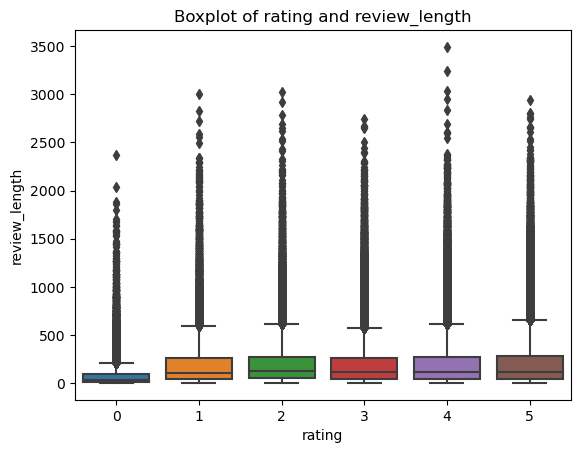

In [56]:
sns.boxplot(x=train['rating'], y=train['review_length']).set(title="Boxplot of rating and review_length");

In [59]:
train.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,...,month_read_at,month_added,month_updated,dayofweek_read_at,dayofweek_added,dayofweek_updated,year_read_at,year_added,year_updated,spoiler
604996,c511ad35264bee1ead8aee4ea0fd1955,9366996,0519e6360f257bd08073053276bc1e6c,"Great cover, very lovely. Go flower petals. An...",2011-02-16 20:20:25-08:00,2012-04-09 16:47:24-07:00,2011-09-01 00:00:00-07:00,2011-08-22 22:16:44.792318198-07:00,3,0,...,9,2,4,3,2,0,2011,2011,2012,0
715148,215088158d1206b9f65b27ed950b304d,6148028,f65579a2a19b1f915d755d1984d2731e,"Started slow, but once the Quell began, I was ...",2012-03-19 12:44:02-07:00,2013-11-27 22:24:36-08:00,2013-11-25 00:00:00-08:00,2013-11-15 22:16:44.792318198-08:00,0,0,...,11,3,11,0,0,2,2013,2012,2013,0
22535,0223a9592bfaf2edce5a348a293c254b,25801632,6fbc649109c5d4761c88e31d9bb95598,ARC provided by publisher in exchange for an h...,2016-05-20 15:06:51-07:00,2016-05-31 08:17:07-07:00,2016-05-20 00:00:00-07:00,2016-05-10 22:16:44.792318198-07:00,16,4,...,5,5,5,4,4,1,2016,2016,2016,0
423076,944690beb2624a8e504d7ab3c735c72d,9349915,6f7edf9c17ad5b1fc60b6d71d81e2487,Okay. First things first - did I really get re...,2011-06-13 20:25:31-07:00,2012-01-10 23:34:20-08:00,2012-01-10 23:34:20-08:00,2012-01-01 00:00:00-08:00,0,0,...,1,6,1,1,0,1,2012,2011,2012,0
859669,dedcd3e476cf511e6b9ed2d005a67d41,24718197,7d9ea6f7f0d047cff88c95447531833c,I'm loving this series. It's pretty perfect fo...,2016-10-30 20:01:13-07:00,2017-06-13 18:32:33-07:00,2017-06-02 13:53:42-07:00,2017-05-31 00:00:00-07:00,18,16,...,6,10,6,4,6,1,2017,2016,2017,0


In [61]:
train["updated"] = (train["date_updated"] == train["date_added"]).astype(int)

In [65]:
train["update_duration"] = train["date_updated"] - train["date_added"]

In [67]:
train["read_duration"] = train["read_at"] - train["started_at"]

In [69]:
train["added_at_read"] = (train["read_at"] == train["date_added"]).astype(int)

In [74]:
train["duration_added_at_read"] = train["read_at"] - train["date_added"]

In [70]:
train["added_at_start"] = (train["started_at"] == train["date_added"]).astype(int)

In [75]:
train["duration_added_at_start"] = train["started_at"] - train["date_added"]

In [72]:
train["updated_at_read"] = (train["read_at"] == train["date_updated"]).astype(int)

In [76]:
train["duration_updated_at_read"] = train["read_at"] - train["date_updated"]

In [88]:
train["duration_updated_at_read"] = train["duration_updated_at_read"].astype(int)/ 10**9

In [89]:
train["duration_added_at_start"] = train["duration_added_at_start"].astype(int)/ 10**9

In [90]:
train["duration_added_at_read"] = train["duration_added_at_read"].astype(int)/ 10**9

In [91]:
train["read_duration"] = train["read_duration"].astype(int)/ 10**9

In [92]:
train["update_duration"] = train["update_duration"].astype(int)/ 10**9

In [97]:
train.columns

Index(['user_id', 'book_id', 'review_id', 'review_text', 'n_votes',
       'n_comments', 'rating', 'missing_started_at', 'review_length',
       'hour_read_at', 'hour_added', 'hour_updated', 'month_read_at',
       'month_added', 'month_updated', 'dayofweek_read_at', 'dayofweek_added',
       'dayofweek_updated', 'year_read_at', 'year_added', 'year_updated',
       'spoiler', 'updated', 'update_duration', 'read_duration',
       'added_at_read', 'added_at_start', 'updated_at_read',
       'duration_added_at_read', 'duration_added_at_start',
       'duration_updated_at_read'],
      dtype='object')

In [96]:
train = train.drop(['date_added', 'date_updated', 'read_at', 'started_at', 'duration'], axis = 1)

/var/folders/34/10vhhcg12q3dsbct81sbwq0c0000gn/T/ipykernel_79668/3893919727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr(method="spearman")


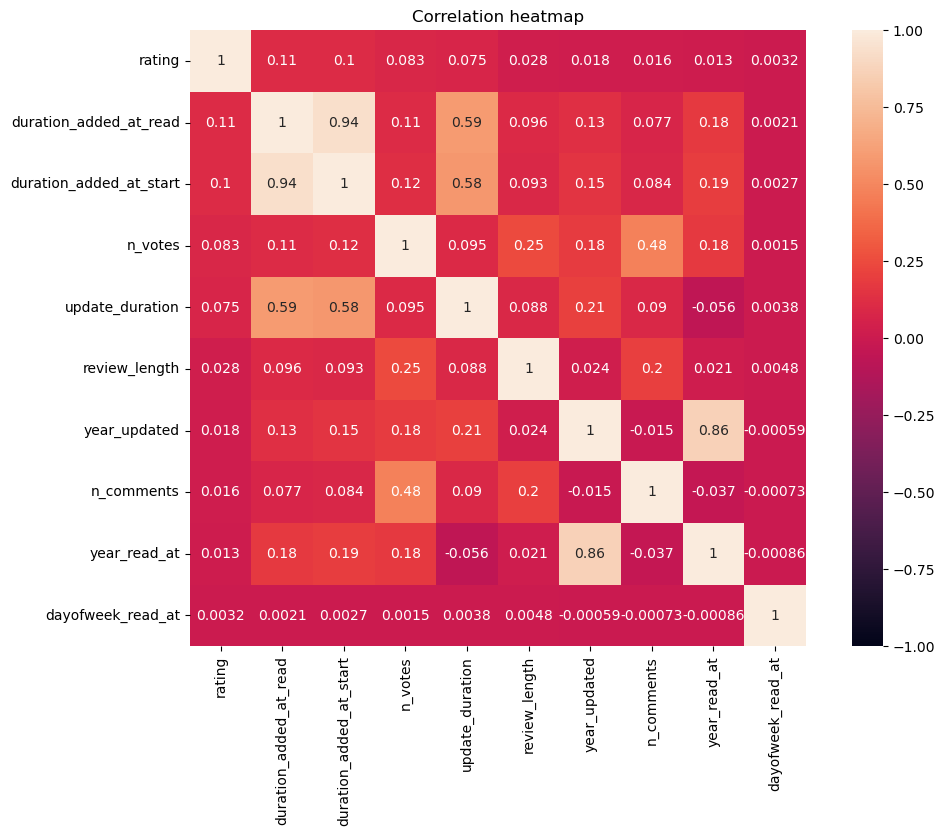

In [98]:
fig, ax = plt.subplots(figsize=(12,8)) 
corrmat = train.corr(method="spearman")
cols = corrmat.nlargest(10, 'rating').index
sns.heatmap(corrmat.loc[cols, cols], square=True, annot=True, vmin = -1, vmax = 1, ax=ax).set(title='Correlation heatmap');

In [100]:
train["review_length"].describe()

count    810000.000000
mean        192.918746
std         225.577338
min           1.000000
25%          40.000000
50%         110.000000
75%         265.000000
max        3493.000000
Name: review_length, dtype: float64

In [101]:
train["read_duration"].describe()

count    8.100000e+05
mean     7.837952e+05
std      7.119616e+06
min     -3.317085e+08
25%      1.389425e+05
50%      5.184000e+05
75%      7.837952e+05
max      1.730851e+09
Name: read_duration, dtype: float64

In [127]:
def process1(train):
    train["n_votes"] = abs(train["n_votes"])
    train["n_comments"] = abs(train["n_comments"])
    train['book_id'] = train['book_id'].astype(object) 
    train['read_at'].fillna(train['date_added'], inplace=True)
    train['date_added'] = pd.to_datetime(train['date_added'], format="%a %b %d %H:%M:%S %z %Y", errors = 'coerce')
    train['date_updated'] = pd.to_datetime(train['date_updated'], format="%a %b %d %H:%M:%S %z %Y", errors = 'coerce')
    train['read_at'] = pd.to_datetime(train['read_at'], format="%a %b %d %H:%M:%S %z %Y", errors = 'coerce')
    train['started_at'].fillna(train['started_at'].mode(), inplace=True)
    train['started_at'] = pd.to_datetime(train['started_at'], format="%a %b %d %H:%M:%S %z %Y", errors = 'coerce')  
    train['started_at'].fillna(train['started_at'].mode(), inplace=True)
    return train

In [103]:
def process2(train):
    train["missing_started_at"] = train["started_at"].isna().astype(int)    
    train["duration"] = train["read_at"] - train["started_at"]    
    train["started_at"].fillna(train["read_at"]-train["duration"].mean(), inplace=True)
    train["duration"].fillna(train["duration"].mean(), inplace=True)
    train["review_length"] = train["review_text"].apply(lambda n: len(n.split()))    
    train["hour_read_at"] = train["read_at"].apply(lambda x: x.hour)
    train["hour_added"] = train["date_added"].apply(lambda x: x.hour)
    train["hour_updated"] = train["date_updated"].apply(lambda x: x.hour)
    train["month_read_at"] = train["read_at"].apply(lambda x: x.month)
    train["month_added"] = train["date_added"].apply(lambda x: x.month)
    train["month_updated"] = train["date_updated"].apply(lambda x: x.month)
    train["dayofweek_read_at"] = train["read_at"].apply(lambda x: x.dayofweek)
    train["dayofweek_added"] = train["date_added"].apply(lambda x: x.dayofweek)
    train["dayofweek_updated"] = train["date_updated"].apply(lambda x: x.dayofweek)
    train["year_read_at"] = train["read_at"].apply(lambda x: x.year)
    train["year_added"] = train["date_added"].apply(lambda x: x.year)
    train["year_updated"] = train["date_updated"].apply(lambda x: x.year)
    train['spoiler'] = train["review_text"].str.contains("\** spoiler alert \**", case=True, na=False).astype(int)
    return train

In [104]:
def process3(train):
    train["date_added"] = 
    train["updated"] = (train["date_updated"] == train["date_added"]).astype(int)  
    train["update_duration"] = train["date_updated"] - train["date_added"]
    train["read_duration"] = train["read_at"] - train["started_at"]
    train["added_at_read"] = (train["read_at"] == train["date_added"]).astype(int)
    train["duration_added_at_read"] = train["read_at"] - train["date_added"]
    train["added_at_start"] = (train["started_at"] == train["date_added"]).astype(int)
    train["duration_added_at_start"] = train["started_at"] - train["date_added"]
    train["updated_at_read"] = (train["read_at"] == train["date_updated"]).astype(int)
    train["duration_updated_at_read"] = train["read_at"] - train["date_updated"]
    train["duration_updated_at_read"] = train["duration_updated_at_read"].astype(int)/ 10**9
    train["duration_added_at_start"] = train["duration_added_at_start"].astype(int)/ 10**9
    train["duration_added_at_read"] = train["duration_added_at_read"].astype(int)/ 10**9
    train["read_duration"] = train["read_duration"].astype(int)/ 10**9
    train["update_duration"] = train["update_duration"].astype(int)/ 10**9
    train = train.drop(['date_added', 'date_updated', 'read_at', 'started_at', 'duration'], axis = 1)    
    return train

In [105]:
val = process1(val)

In [106]:
val = process2(val)

In [107]:
val = process3(val)

In [154]:
test = pd.read_csv("goodreads_test.csv")

In [155]:
len(test)

478033

In [156]:
test.isna().sum()

user_id              0
book_id              0
review_id            0
review_text          0
date_added           0
date_updated         0
read_at          42478
started_at      143044
n_votes              0
n_comments           0
dtype: int64

In [157]:
test = process1(test)

In [158]:
test['started_at'].fillna(pd.Timestamp(test['started_at'].mode()[0]), inplace=True)
test['read_at'].fillna(pd.Timestamp(test['read_at'].mode()[0]), inplace=True)

In [159]:
test.isna().sum()

user_id         0
book_id         0
review_id       0
review_text     0
date_added      0
date_updated    0
read_at         0
started_at      0
n_votes         0
n_comments      0
dtype: int64

In [160]:
test = process2(test)

In [161]:
test.isna().sum()

user_id               0
book_id               0
review_id             0
review_text           0
date_added            0
date_updated          0
read_at               0
started_at            0
n_votes               0
n_comments            0
missing_started_at    0
duration              0
review_length         0
hour_read_at          0
hour_added            0
hour_updated          0
month_read_at         0
month_added           0
month_updated         0
dayofweek_read_at     0
dayofweek_added       0
dayofweek_updated     0
year_read_at          0
year_added            0
year_updated          0
spoiler               0
dtype: int64

In [162]:
len(test)

478033

In [164]:
test = process3(test)

In [165]:
test.isna().sum()

user_id                     0
book_id                     0
review_id                   0
review_text                 0
n_votes                     0
n_comments                  0
missing_started_at          0
review_length               0
hour_read_at                0
hour_added                  0
hour_updated                0
month_read_at               0
month_added                 0
month_updated               0
dayofweek_read_at           0
dayofweek_added             0
dayofweek_updated           0
year_read_at                0
year_added                  0
year_updated                0
spoiler                     0
updated                     0
update_duration             0
read_duration               0
added_at_read               0
duration_added_at_read      0
added_at_start              0
duration_added_at_start     0
updated_at_read             0
duration_updated_at_read    0
dtype: int64

In [166]:
test.head()

,user_id,book_id,review_id,review_text,n_votes,n_comments,missing_started_at,review_length,hour_read_at,hour_added,...,spoiler,updated,update_duration,read_duration,added_at_read,duration_added_at_read,added_at_start,duration_added_at_start,updated_at_read,duration_updated_at_read
0,b9450d1c1f97f891c392b1105959b56e,7092507,5c4df7e70e9b438c761f07a4620ccb7c,** spoiler alert ** \n This is definitely one ...,1,0,0,290,5,6,...,1,0,84743.0,106716.0,0,84743.0,0,-21973.0,1,0.0
1,b9450d1c1f97f891c392b1105959b56e,5576654,8eaeaf13213eeb16ad879a2a2591bbe5,"** spoiler alert ** \n ""You are what you drink...",1,0,0,352,5,21,...,1,0,27993.0,106909.0,0,27993.0,0,-78916.0,1,0.0
2,b9450d1c1f97f891c392b1105959b56e,15754052,dce649b733c153ba5363a0413cac988f,Roar is one of my favorite characters in Under...,0,0,0,74,6,0,...,0,0,107300.0,108850.0,0,107300.0,0,-1550.0,1,0.0
3,b9450d1c1f97f891c392b1105959b56e,17020,8a46df0bb997269d6834f9437a4b0a77,** spoiler alert ** \n If you feel like travel...,0,0,0,246,11,0,...,1,0,212803.0,214522.0,0,212803.0,0,-1719.0,1,0.0
4,b9450d1c1f97f891c392b1105959b56e,12551082,d11d3091e22f1cf3cb865598de197599,3.5 stars \n I read and enjoyed the first two ...,0,0,0,515,0,0,...,0,0,14335431.0,86400.0,0,14079780.0,0,13993380.0,0,-255651.0


In [168]:
list(test.columns)

['user_id',
 'book_id',
 'review_id',
 'review_text',
 'n_votes',
 'n_comments',
 'missing_started_at',
 'review_length',
 'hour_read_at',
 'hour_added',
 'hour_updated',
 'month_read_at',
 'month_added',
 'month_updated',
 'dayofweek_read_at',
 'dayofweek_added',
 'dayofweek_updated',
 'year_read_at',
 'year_added',
 'year_updated',
 'spoiler',
 'updated',
 'update_duration',
 'read_duration',
 'added_at_read',
 'duration_added_at_read',
 'added_at_start',
 'duration_added_at_start',
 'updated_at_read',
 'duration_updated_at_read']

In [170]:
list(train.columns)

['user_id',
 'book_id',
 'review_id',
 'review_text',
 'n_votes',
 'n_comments',
 'rating',
 'missing_started_at',
 'review_length',
 'hour_read_at',
 'hour_added',
 'hour_updated',
 'month_read_at',
 'month_added',
 'month_updated',
 'dayofweek_read_at',
 'dayofweek_added',
 'dayofweek_updated',
 'year_read_at',
 'year_added',
 'year_updated',
 'spoiler',
 'updated',
 'update_duration',
 'read_duration',
 'added_at_read',
 'added_at_start',
 'updated_at_read',
 'duration_added_at_read',
 'duration_added_at_start',
 'duration_updated_at_read']

In [171]:
run3 = wandb.init(project=PROJECT_NAME, entity=ENTITY, job_type="upload")

In [172]:
artifact = wandb.Artifact("Data_processed1", type="dataset")

In [173]:
t_train1 = wandb.Table(dataframe=train)
t_val1 = wandb.Table(dataframe=val)
t_test1 = wandb.Table(dataframe=test)

In [174]:
artifact.add(t_train1, "t_train1")
artifact.add(t_val1, "t_val1")
artifact.add(t_test1, "t_test1")

ArtifactManifestEntry(path='t_test1.table.json', digest='QnRLF/zkErCiqSDCvZc0Kw==', ref=None, birth_artifact_id=None, size=260295702, extra={}, local_path='/Users/dragos/Library/Application Support/wandb/artifacts/staging/tmpg53q_2i7')

In [175]:
run3.log_artifact(artifact)
run3.finish()

In [176]:
train.to_csv("train.csv", index = False)
val.to_csv("val.csv", index = False)
test.to_csv("test.csv", index = False)